In [2]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.82. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [5]:
dataset=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\4-Dated\train_date.csv')

In [6]:
dataset.head(1)

,merchant_id,mcc_id,net_payment_count,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,Settlement Period - 2,...,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4,date
0,14423,91,4997.0,2020,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,2020-01-01


In [38]:
ts_column = 'date'
target = 'net_payment_count'
sep = '-'

# Train Model

In [43]:
FORECAST_PERIOD = 1

In [44]:
model = auto_timeseries(score_type='mae',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['ML'],
                verbose=2)

In [45]:
num = 44
traindata = dataset[:num]
testdata = dataset[num:]
print(traindata.shape, testdata.shape)

(44, 22) (291098, 22)


Start of Fit.....
    Target variable given as = net_payment_count
Start of loading of data.....
    Inputs: ts_column = date, sep = -, target = ['net_payment_count']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (44, 21)
    detected strf_time_format as %Y-%m-%d in train data. You can change it in setup if this is incorrect.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -6.6882703866378215      |
|           p-value           |    4.172199829355171e-09     |
|          #Lags Used         |             0.0              |
| Number of Observations Used |             43.0         

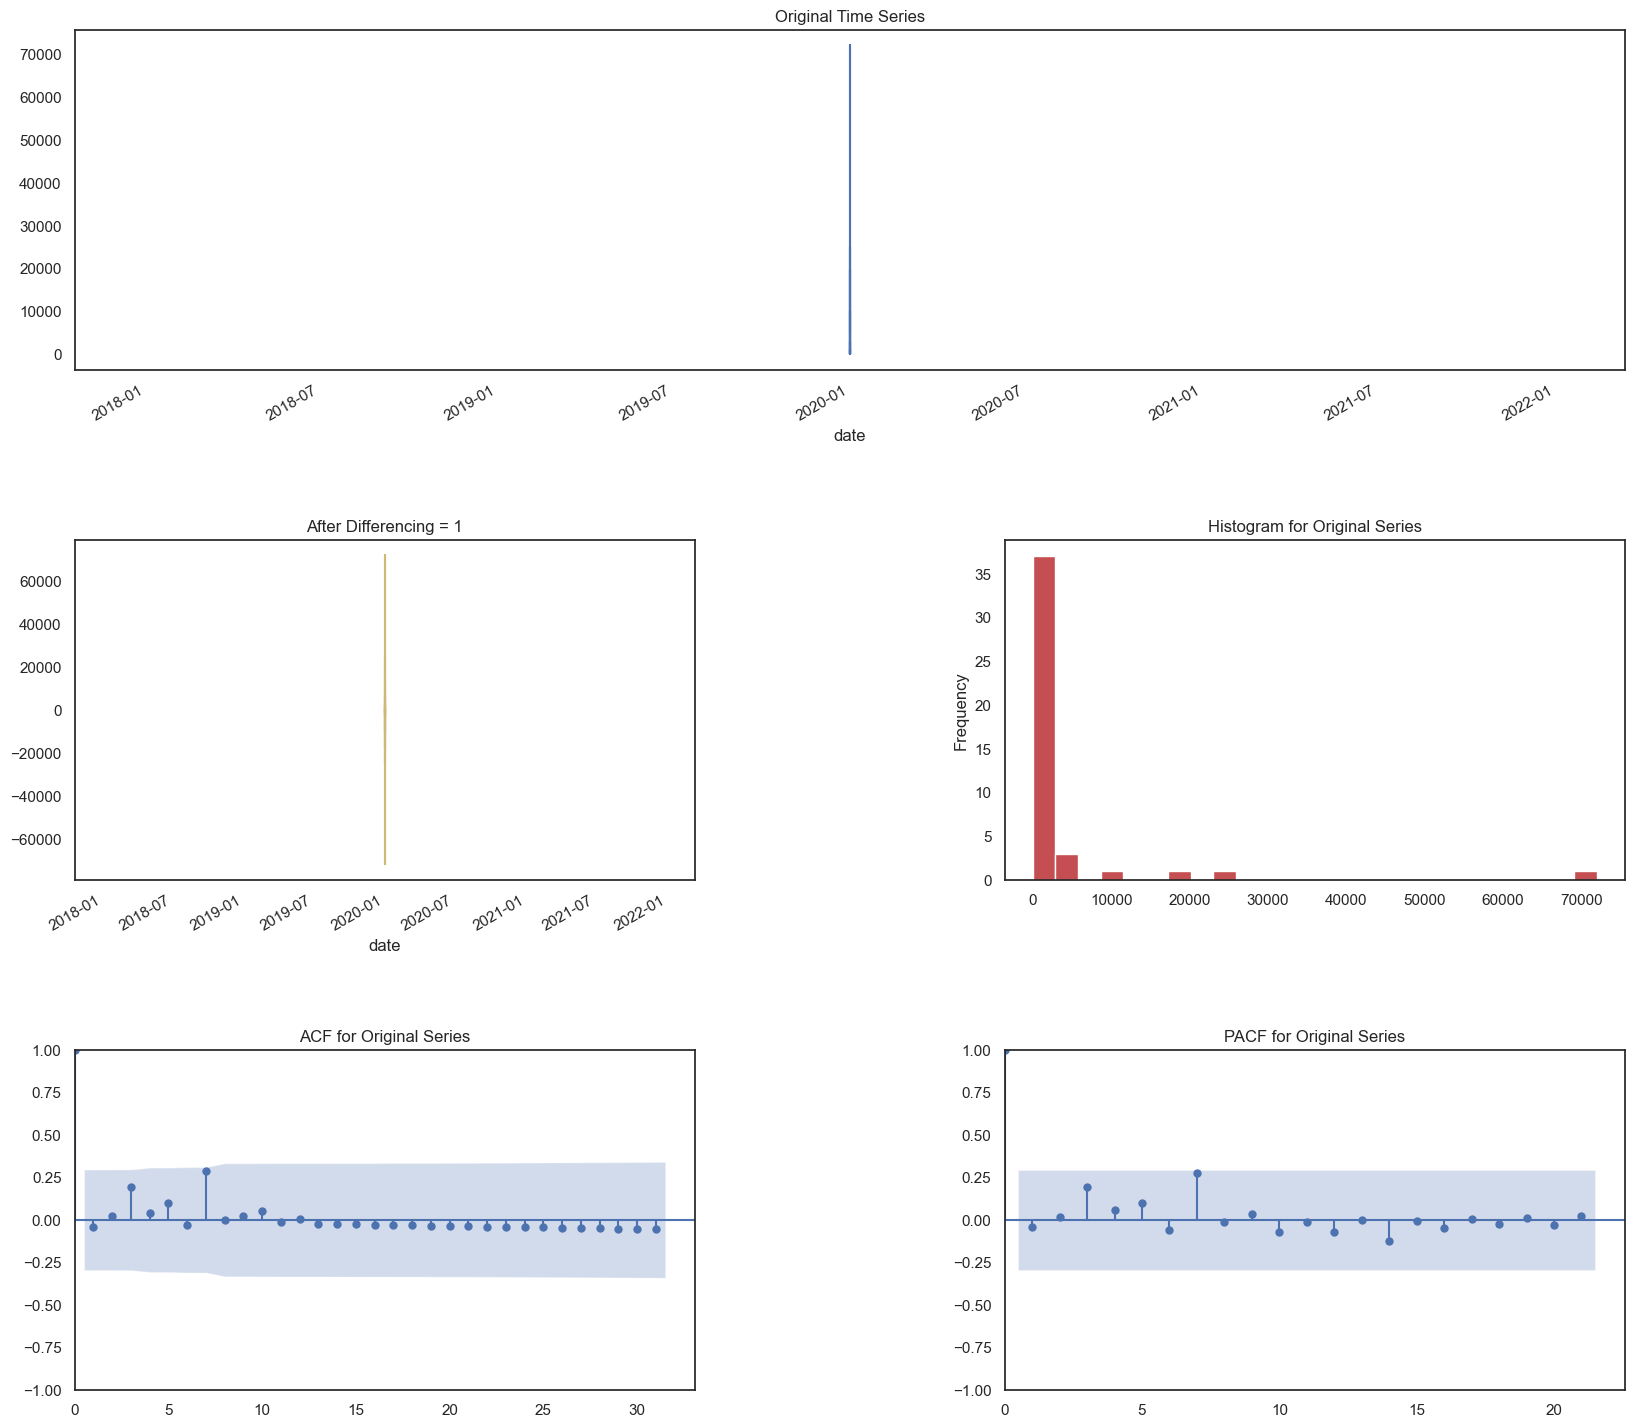

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Running Machine Learning Models...

Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        8 variable(s) removed since they were ID or low-information variables
    We will convert 11 Categorical variables to numeric using a Transformer pipeline...

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating date time derived features. Continuing...

Fitting ML model
    33 variables used in training ML model = ['mcc_id(t)', 'Merchant Source - 1(t)', 'Merchant Source - 

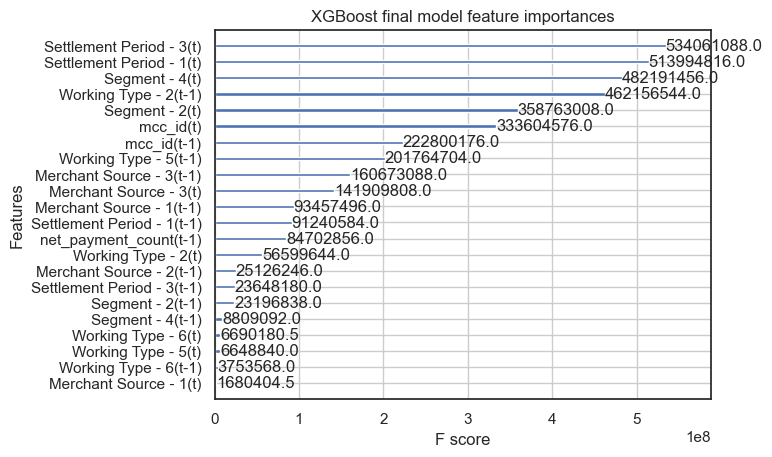

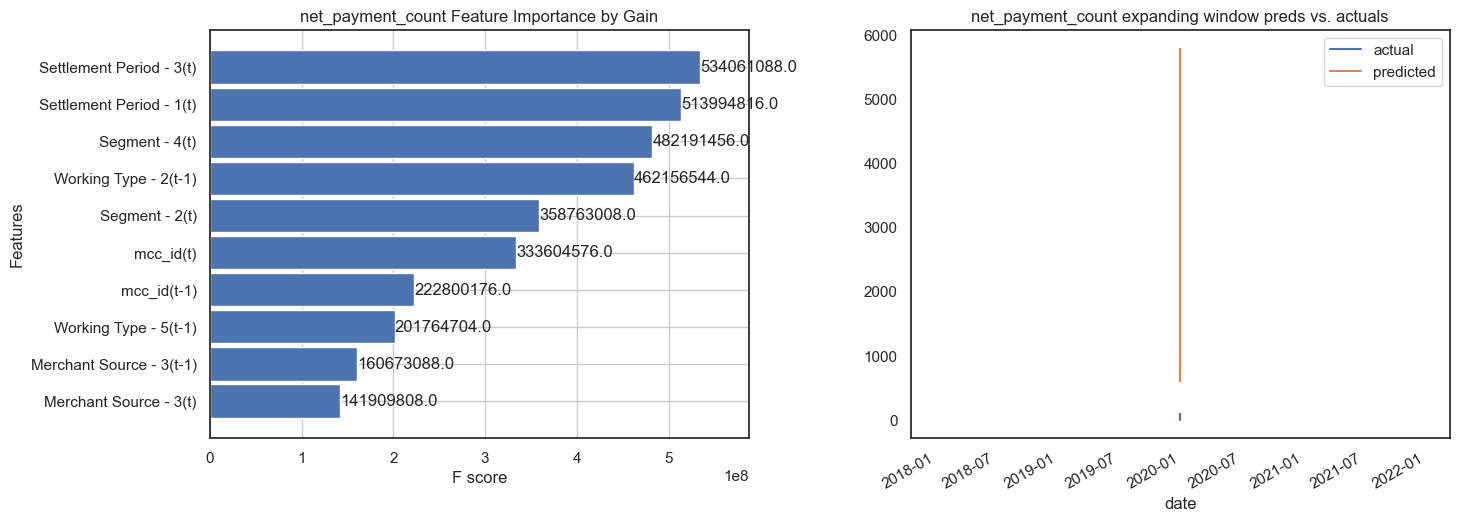

In [46]:
model.fit(
    traindata=traindata,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=5,
    sep=sep)        

# Evaluate Results

In [47]:
model.get_leaderboard()

,name,mae
0,ML,77.849439


In [16]:
model.plot_cv_scores()

AttributeError: 'DataFrame' object has no attribute 'append'

In [17]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

AttributeError: 'DataFrame' object has no attribute 'append'

In [18]:
results_dict = model.get_ml_dict()

In [20]:
results_dict['Prophet']['forecast']  

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [21]:
results_dict['auto_SARIMAX']['forecast'] 

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [22]:
results_dict['ML']['forecast'] 

[array([[ 752.6801 ],
        [ 802.20795],
        [5788.7827 ],
        [ 602.62366],
        [ 893.693  ]], dtype=float32)]

In [23]:
testdata['preds'] = model.predict(testdata, model='ML', simple=False)['yhat'].values

Predicting using test dataframe shape = (291098, 22) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for date. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating 

TypeError: 'NoneType' object is not subscriptable

<AxesSubplot:>

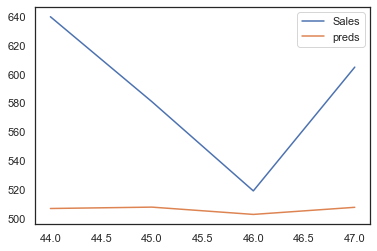

In [ ]:
testdata[[target, 'preds']].plot()

In [17]:
testdata

,Time Period,Sales,Marketing Expense,preds
44,2014-09-01,640,718.98,506.763031
45,2014-10-01,581,570.30,507.718658
46,2014-11-01,519,527.60,502.653412
47,2014-12-01,605,559.75,507.591766


# Forecast Results

In [19]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

Predicting using forecast period=12 as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
(Error) Testdata must be pandas dataframe for ML model. No predictions will be made.


In [20]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Predicting using forecast period=12 as input for ML model
(Error) Model of type 'auto_SARIMAX' does not exist. No predictions will be made.


In [21]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Predicting using forecast period=12 as input for ML model
(Error) Model of type 'Prophet' does not exist. No predictions will be made.


In [22]:
model.get_best_model()

XGBRegressor(n_estimators=400, verbosity=0)

In [23]:
xgb_model = model.get_model('ML')
xgb_model

XGBRegressor(n_estimators=400, verbosity=0)

In [24]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [25]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [26]:
dataset['yhat'] = model.predict(dataset, model='ML', simple=False)['yhat'].values

Predicting using test dataframe as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    train time series Time Period column exists ...
Your testdata dataframe contains the target column as well. This will be deleted for the predictions.
    ML predictions completed


<AxesSubplot:>

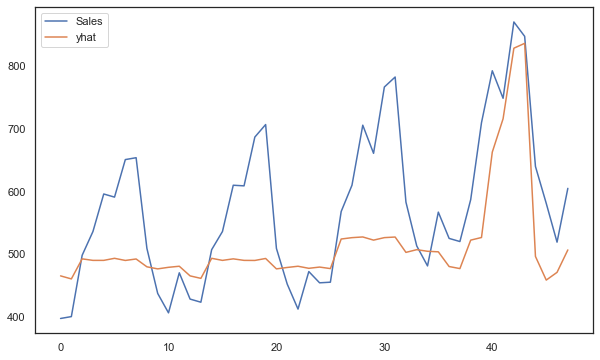

In [27]:
dataset[[target,'yhat']].plot(figsize=(10,6))